In [1]:
""" K-Nearest Neighbors

Process overview:
(0) Load data, normalize
(1) Define distance fnc (e.g. Euclidean (sqrt of sum of square differences), 
    Manhattan (sum of abs differences), Minkowski ((sum of abs(diff)^q)^1/q))
(2) For classification, decision is majority decision of nearest points. For 
    regression, it' simply the average
    

IMPROVEMENT IDEAS: different dist fncs, use cross-validation to pick best K,
do regression instead of classification.
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

/usr/local/Cellar/python/3.6.5/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/local/Cellar/python/3.6.5/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [5]:
# Load in our data easily using pandas and display a few rows
data = pd.read_csv('../data/iris.txt',names=["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm", "Species"])
print(data.head(), '\n')

# Normalize, noting we exclude the species (y) column because it is categorical.
data.iloc[:, :-1] = (data.iloc[:, :-1] - data.iloc[:, :-1].mean())/data.iloc[:, :-1].std()
print(data.head())

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa 

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0      -0.897674      1.028611      -1.336794     -1.308593  Iris-setosa
1      -1.139200     -0.124540      -1.336794     -1.308593  Iris-setosa
2      -1.380727      0.336720      -1.393470     -1.308593  Iris-setosa
3      -1.501490      0.106090      -1.280118     -1.308593  Iris-setosa
4      -1.018437      1.259242      -1.336794     -1.308593  Iris-setosa


In [171]:
labels = {key: idx for idx, key in enumerate(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'])}
labels = np.array([labels[i] for i in data.iloc[:, -1]]).T

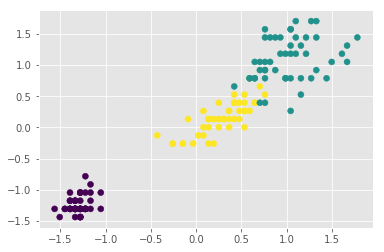

In [172]:
# Plot what y's look like against the last two features.
plt.scatter(data.iloc[:, 2], data.iloc[:, 3], c=labels)

In [199]:
# Split data into train, test
stop = int(len(data)*0.80)
x, y = data[:stop], data[stop:]

# Seperate out features and corresponding labels
x, x_labels = np.array(x.iloc[:, :-1]), np.array(x.iloc[:, -1])
y, y_labels = np.array(y.iloc[:, :-1]), np.array(y.iloc[:, -1])

In [200]:
def dist(x, point, k):
    """ Compute the Euclidean distance between a point and the
    rest of the dataset and return its top K nearest points.
    NOTE: odd k's are better to avoid ties for classification
    """
    euclidean_dist = np.sqrt(np.sum((x - point)**2, axis=1))
    return np.argsort(euclidean_dist)[:k]

def most_common(lst):
    """ Return most common element in a list
    """
    return max(set(lst), key=lst.count)

def knn_decision(x, x_labels, point, k):
    """ KNN classifier
    """
    return most_common(x_labels[dist(x, point, k)].tolist())

In [208]:
best = -1
for k in range(1, 35, 3):
    true, false = 0, 0
    for i, l in zip(y, y_labels):
        pred = knn_decision(x, x_labels, i, k)
        if pred == l:
            true += 1
        else:
            false += 1

    acc = true/(true+false)*100
    print('Accuracy with %d-NN: %.1f percent'%(k, acc))
    
    if best < acc:
        best_k = k
        best = acc
        
print('\nBest accuracy was %.2f when k=%d for this data and split.'%(best, best_k))

Accuracy with 1-NN: 86.7 percent
Accuracy with 4-NN: 80.0 percent
Accuracy with 7-NN: 73.3 percent
Accuracy with 10-NN: 73.3 percent
Accuracy with 13-NN: 63.3 percent
Accuracy with 16-NN: 63.3 percent
Accuracy with 19-NN: 56.7 percent
Accuracy with 22-NN: 53.3 percent
Accuracy with 25-NN: 36.7 percent
Accuracy with 28-NN: 33.3 percent
Accuracy with 31-NN: 3.3 percent
Accuracy with 34-NN: 0.0 percent

Best accuracy was 86.67 when k=1 for this data and split.
